In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

## Загрузка и подготовка данных

In [3]:
data_1 = pd.read_csv('/content/drive/My Drive/Collab file/geo_data_0.csv') 
data_2 = pd.read_csv('/content/drive/My Drive/Collab file/geo_data_1.csv')
data_3 = pd.read_csv('/content/drive/My Drive/Collab file/geo_data_2.csv')

In [4]:
# функция для распаковки данных

def open_data(data):
  display(data.head())
  print('------------------------')
  print('Общая информация')
  data.info()
  print('------------------------')
  print('Описание данных')
  display(data.describe())
  print('------------------------')
  print('Количество дубликатов')
  print(data.duplicated().sum())
  print('------------------------')
  print('Количество пропусков')
  display(data.isna().sum())

### Первый регион

In [5]:
open_data(data_1)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------
Описание данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
#удалим столбец id, чтобы не мешал обучению модели, важной информации он не несет

data_1 = data_1.drop(['id'], axis=1)

**Комментарий:**
<br>Типы данных в порядке, дубликатов и пропусков нет.

Text(0.5, 1.0, 'Тепловая карта корреляции')

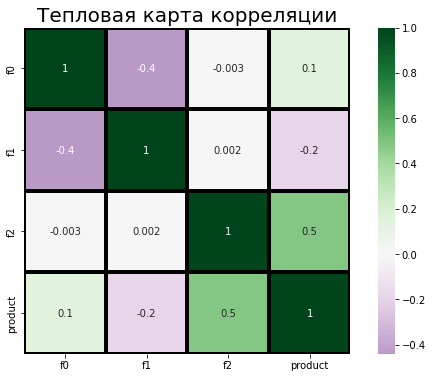

In [7]:
#посмотрим на взаимосвязь данных

plt.figure(figsize=(10,6))

sns.heatmap(data_1.corr(), annot=True, square=True, center=0, fmt='.1g', cmap='PRGn', linecolor='black', linewidths=3)
plt.title(label='Тепловая карта корреляции', fontsize=20)

**Краткий вывод** 
<br>Большой корреляции между признаками и целевым признаком не выявлено. Наибольшую корреляцию имеет ***f2*** и целевой признак ***product***.

### Второй регион

In [8]:
open_data(data_2)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------
Описание данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [9]:
#удалим столбец id, чтобы не мешал обучению модели, важной информации он не несет

data_2 = data_2.drop(['id'], axis=1)

**Комментарий:**
<br>Типы данных в порядке, дубликатов и пропусков нет.

Text(0.5, 1.0, 'Тепловая карта корреляции')

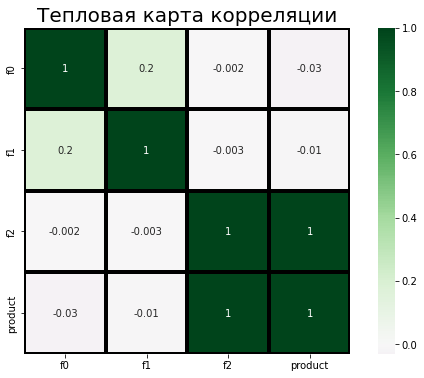

In [10]:
#посмотрим на взаимосвязь данных

plt.figure(figsize=(10,6))

sns.heatmap(data_2.corr(), annot=True, square=True, center=0, fmt='.1g', cmap='PRGn', linecolor='black', linewidths=3)
plt.title(label='Тепловая карта корреляции', fontsize=20)

**Краткий вывод** 
<br>Выявлена полная положительная корреляция между признаком ***f2*** и целевым признаком ***product***. 

### Третий регион

In [11]:
open_data(data_3)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------
Описание данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
#удалим столбец id, чтобы не мешал обучению модели, важной информации он не несет

data_3 = data_3.drop(['id'], axis=1)

**Комментарий:**
<br>Типы данных в порядке, дубликатов и пропусков нет.

Text(0.5, 1.0, 'Тепловая карта корреляции')

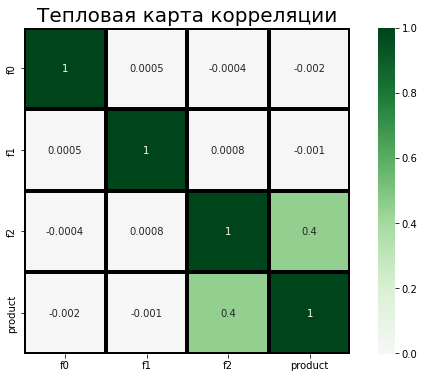

In [13]:
#посмотрим на взаимосвязь данных

plt.figure(figsize=(10,6))

sns.heatmap(data_3.corr(), annot=True, square=True, center=0, fmt='.1g', cmap='PRGn', linecolor='black', linewidths=3)
plt.title(label='Тепловая карта корреляции', fontsize=20)

**Краткий вывод** 
<br>Здесь наблюдается наименьшая корреляция со всеми данными.

### Общий вывод по разделу

 - Данные по трем регионам в порядке - пропусков нет, типы данных соответствующие
 - Был удален признак ***id*** из всех таблиц, так как не является показательным. 
 - Признаки - ***f0, f1, f2***, целевой признак - ***product***.
 - Выявлена прямая положительная корреляция во втором регионе между признаками ***f2*** и ***product***, также между этими признаками высокая корреляция и в других регионах.
 - Наименьшую корреляцию имеют признаки по третьему региону.

## Обучение и проверка модели

### Первый регион

In [14]:
#разобьем данные на обучающую и валидационную выборки в отношении 72:25

features_1 = data_1.drop(['product'], axis=1)
target_1 = data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
                features_1, target_1, test_size=0.25, random_state=12345)

In [15]:
%%time

# подберем наилучшие параметры с помощью кросс-валидации

model_lr_1 = LinearRegression()
params_lr_1 = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

random_cv_1 = GridSearchCV(model_lr_1, params_lr_1, cv=3, scoring='neg_mean_squared_error')
random_cv_1.fit(features_train_1, target_train_1)

print('Лучшие гиперпараметры для модели:', random_cv_1.best_params_) 

Лучшие гиперпараметры для модели: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
CPU times: user 491 ms, sys: 447 ms, total: 939 ms
Wall time: 535 ms


In [16]:
%%time

# обучим модель

model_lr_1 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
model_lr_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_lr_1.predict(features_valid_1)

# и посчитаем RMSE

mse_1 = mean_squared_error(target_valid_1, predicted_valid_1)
rmse_1 = mse_1 ** 0.5
print("MSE =", mse_1)
print("RMSE =", rmse_1)

MSE = 1412.2129364399243
RMSE = 37.5794217150813
CPU times: user 22 ms, sys: 7.35 ms, total: 29.3 ms
Wall time: 23.4 ms


In [17]:
#выведем таблицу с реальными и предсказанными данными по сырью

frame_1 = {'real_product' : target_valid_1,
            'predicted_product' : predicted_valid_1         
    }
data_frame_1 = pd.DataFrame(frame_1, columns = ['real_product', 'predicted_product'])
print(data_frame_1.head(5))
print()
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_1.mean()))

       real_product  predicted_product
71751     10.038645          95.894952
80493    114.551489          77.572583
2655     132.603635          77.892640
53233    169.072125          90.175134
91141    122.325180          70.510088

Средний запас предсказанного сырья: 92.59


In [18]:
print('Вывод по первому региону:')
print()
print("RMSE =", mse_1 ** 0.5)
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_1.mean()))
print('R2 =', r2_score(target_valid_1, predicted_valid_1))
print('MAE =', mean_absolute_error(target_valid_1, predicted_valid_1))

Вывод по первому региону:

RMSE = 37.5794217150813
Средний запас предсказанного сырья: 92.59
R2 = 0.27994321524487786
MAE = 30.919600777151313


**Краткий вывод** 
<br>Средняя квадратичная ошибка достаточно большая, необходимо посмотреть на результаты других регионов.

### Второй регион

In [19]:
#разобьем данные на обучающую и валидационную выборки в отношении 72:25

features_2 = data_2.drop(['product'], axis=1)
target_2 = data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
                features_2, target_2, test_size=0.25, random_state=12345)

In [20]:
%%time

# подберем наилучшие параметры с помощью кросс-валидации

model_lr_2 = LinearRegression()
params_lr_2 = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

random_cv_2 = GridSearchCV(model_lr_2, params_lr_2, cv=3, scoring='neg_mean_squared_error')
random_cv_2.fit(features_train_2, target_train_2)

print('Лучшие гиперпараметры для модели:', random_cv_2.best_params_) 

Лучшие гиперпараметры для модели: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
CPU times: user 412 ms, sys: 357 ms, total: 768 ms
Wall time: 472 ms


In [21]:
%%time

# обучим модель

model_2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)

# и посчитаем RMSE

mse_2 = mean_squared_error(target_valid_2, predicted_valid_2)
rmse_2 = mse_2 ** 0.5
print("MSE =", mse_2)
print("RMSE =", rmse_2)

MSE = 0.7976263360391157
RMSE = 0.893099286775617
CPU times: user 15.1 ms, sys: 18.2 ms, total: 33.3 ms
Wall time: 18.5 ms


In [22]:
#выведем таблицу с реальными и предсказанными данными по сырью

frame_2 = {'real_product' : target_valid_2,
            'predicted_product' : predicted_valid_2         
    }
data_frame_2 = pd.DataFrame(frame_2, columns = ['real_product', 'predicted_product'])
print(data_frame_2.head(5))
print()
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_2.mean()))

       real_product  predicted_product
71751     80.859783          82.663314
80493     53.906522          54.431786
2655      30.132364          29.748760
53233     53.906522          53.552133
91141      0.000000           1.243856

Средний запас предсказанного сырья: 68.73


In [23]:
print('Вывод по второму региону:')
print()
print("RMSE =", mse_2 ** 0.5)
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_2.mean()))
print('R2 =', r2_score(target_valid_2, predicted_valid_2))
print('MAE =', mean_absolute_error(target_valid_2, predicted_valid_2))

Вывод по второму региону:

RMSE = 0.893099286775617
Средний запас предсказанного сырья: 68.73
R2 = 0.9996233978805127
MAE = 0.7187662442124758


**Краткий вывод** 
<br>Показатели RMSE и MAE значительно лучше здесь, однако средний запас сырья сильно ниже, чем в первом регионе.

### Третий регион

In [24]:
# разобьем данные на обучающую и валидационную выборки в отношении 72:25

features_3 = data_3.drop(['product'], axis=1)
target_3 = data_3['product']

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
                features_3, target_3, test_size=0.25, random_state=12345)

In [25]:
%%time

# подберем наилучшие параметры с помощью кросс-валидации

model_lr_3 = LinearRegression()
params_lr_3 = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

random_cv_3 = GridSearchCV(model_lr_3, params_lr_3, cv=3, scoring='neg_mean_squared_error')
random_cv_3.fit(features_train_3, target_train_3)

print('Лучшие гиперпараметры для модели:', random_cv_3.best_params_) 

Лучшие гиперпараметры для модели: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
CPU times: user 421 ms, sys: 345 ms, total: 766 ms
Wall time: 411 ms


In [26]:
%%time

# обучим модель

model_3 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
model_3.fit(features_train_3, target_train_3)
predicted_valid_3 = model_3.predict(features_valid_3)

# и посчитаем RMSE

mse_3 = mean_squared_error(target_valid_3, predicted_valid_3)
rmse_3 = mse_3 ** 0.5
print("MSE =", mse_3)
print("RMSE =", rmse_3)

MSE = 1602.3775813236196
RMSE = 40.02970873393434
CPU times: user 22.4 ms, sys: 9.91 ms, total: 32.3 ms
Wall time: 22.5 ms


In [27]:
#выведем таблицу с реальными и предсказанными данными по сырью

frame_3 = {'real_product' : target_valid_3,
            'predicted_product' : predicted_valid_3         
    }
data_frame_3 = pd.DataFrame(frame_3, columns = ['real_product', 'predicted_product'])
print(data_frame_3.head(5))
print()
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_3.mean()))

       real_product  predicted_product
71751     61.212375          93.599633
80493     41.850118          75.105159
2655      57.776581          90.066809
53233    100.053761         105.162375
91141    109.897122         115.303310

Средний запас предсказанного сырья: 94.97


In [28]:
print('Вывод по третьему региону:')
print()
print("RMSE =", mse_3 ** 0.5)
print('Средний запас предсказанного сырья: {:.2f}'.format(predicted_valid_3.mean()))
print('R2 =', r2_score(target_valid_3, predicted_valid_3))
print('MAE =', mean_absolute_error(target_valid_3, predicted_valid_3))

Вывод по третьему региону:

RMSE = 40.02970873393434
Средний запас предсказанного сырья: 94.97
R2 = 0.20524758386040443
MAE = 32.792652105481814


**Краткий вывод** 
<br>В этом регионе наилучшие показатели по запасу сырья, однако RMSE и MAE хуже, чем в остальных.

### Общий вывод по разделу

**Первый регион:**

- RMSE = 37.5794217150813
- Средний запас предсказанного сырья: 92.59

**Второй регион:**

- RMSE = 0.893099286775617
- Средний запас предсказанного сырья: 68.73

**Третий регион:**

- RMSE = 40.02970873393434
- Средний запас предсказанного сырья: 94.97

**Выводы:**

- По второму региону показатели запаса сырья являются самыми низкими, однако именно на этих данных модель отработала лучше всего. Средняя квадратичная ошибка достаточно низкая. Вероятно, это связано с тем, что мы наблюдаем тут прямую корреляцию между признаками f2 и целевым признаком.
- В третьем регионе показатели запаса сырья самые высокие, однако модель достаточно плохо отработала на этих данных. Возможно, потому что корреляция между всеми признаками довольно низкая.
- На данный момент первый регион выглядит приоритетным с точки зрения всех показателей, если его сравнивать с остальными регионами.

## Подготовка к расчёту прибыли

**Дано:**

- Исследуют 500 точек, выбирают 200, введем переменную: *oilwell_count = 200*
- Бюджет на разработку скважин в регионе — 10 млрд рублей, переменная: *region_budget = 10.000.000.000*
- Доход с каждой единицы продукта составляет 450 тыс. рублей, переменная: *unit_revenue = 450.000*

In [29]:
oilwell_count = 200
region_budget = 10000000000
barrel_revenue = 450
unit_revenue = 450000

In [30]:
# из данных нам вводных найдем все возможные нужные для нас переменные

oilwell_budget = region_budget / oilwell_count
min_revenue = oilwell_budget / unit_revenue

print('Стоимость разработки одной скважины: {:.2f}'.format(oilwell_budget))
print('Минимальный объем сырья для дальнейшей разработки: {:.2f}'.format(min_revenue))

Стоимость разработки одной скважины: 50000000.00
Минимальный объем сырья для дальнейшей разработки: 111.11


In [31]:
#посмотрим на фактические значения запасов сырья в регионах

print('Средний фактический запас сырья в первом регионе: {:.2f}'.format(target_1.mean()))
print('Средний фактический запас сырья во втором регионе: {:.2f}'.format(target_2.mean()))
print('Средний фактический запас сырья в третьем регионе: {:.2f}'.format(target_3.mean()))

Средний фактический запас сырья в первом регионе: 92.50
Средний фактический запас сырья во втором регионе: 68.83
Средний фактический запас сырья в третьем регионе: 95.00


### Общий вывод по разделу

- Стоимость разработки 1 скважины - 50 млн.руб
- Минимальный объем сырья для дальнейшей разработки: 111 единиц
- Ни один регион на данный момент не проходит по минимальным значениям, ближе всего 3 регион.

## Расчёт прибыли и рисков 

In [32]:
#напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели 

def revenue(target, predictions):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    pred_sorted = predictions.sort_values(ascending=False)
    selected = target[pred_sorted.index][:200]
    revenue = ((selected.sum() * unit_revenue) - region_budget)
    return revenue

In [33]:
#первый регион

print('Прибыль топ-200 скважин: {:.2f}'.format(revenue(target_valid_1, predicted_valid_1)))

Прибыль топ-200 скважин: 3320826043.14


In [34]:
#второй регион

print('Прибыль топ-200 скважин: {:.2f}'.format(revenue(target_valid_2, predicted_valid_2)))

Прибыль топ-200 скважин: 2415086696.68


In [35]:
#третий регион

print('Прибыль топ-200 скважин: {:.2f}'.format(revenue(target_valid_3, predicted_valid_3)))

Прибыль топ-200 скважин: 2710349963.60


В первом регионе самый большой показатель выручки. 

In [36]:
state = np.random.RandomState(12345)
def bootstrap (target, probabilities):
    values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue(target_subsample,  probs_subsample))
    

    risk = 0.025
    values = pd.Series(values)
    lower = values.quantile(risk)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))
    mean = values.mean()
    
    print('Средняя выручка: {:.2f}'.format(mean))
    print('2.5%-квантиль: {:.2f}'.format(lower))
    print('Доверительный интервал:', confidence_interval)
    print('Риск убытка:', ((values < 0).mean()))

In [37]:
#первый регион

bootstrap(target_valid_1, predicted_valid_1)

Средняя выручка: 396164984.80
2.5%-квантиль: -111215545.89
Доверительный интервал: (-111215545.89049526, 909766941.5534226)
Риск убытка: 0.069


In [38]:
#второй регион

bootstrap(target_valid_2, predicted_valid_2)

Средняя выручка: 461155817.28
2.5%-квантиль: 78050810.75
Доверительный интервал: (78050810.7517417, 862952060.2637234)
Риск убытка: 0.007


In [39]:
#третий регион

bootstrap(target_valid_3, predicted_valid_3)

Средняя выручка: 392950475.17
2.5%-квантиль: -112227625.38
Доверительный интервал: (-112227625.37857565, 934562914.5511636)
Риск убытка: 0.065


### Общий вывод по разделу

- Единственный регион, который проходит под условия задачи - это второй регион. Риск убытка тут минимальный.
- Интересно, что показатели по первому и третьему региону очень близки друг к другу.

## Общий итог

Второй регион является самым подходящим для бизнеса. Риск убытка здесь минимальный, также показатель средней выручки максимальный из всех трех регионов. Запасы сырья здесь самые низкие, однако это не влияет на показатель выручки.